# Résolution de systèmes non-linéaires

**Basile Marchand --- Mines ParisTech**

## Systèmes non-linéaires

Dans le cadre de la mécaniques des matériaux et des solides il apparaît très souvent des problèmes non-linéaires. En effet, dès que la formulation du problème fait intervenir des lois de comportement non-linéaires il n'est plus possible de se ramener directement à la résolution d'un système linaire de la forme $\mathbf{K}\cdot{U} = \mathbf{F}$

En revanche on se ramène, dans ce cadre non-linéaire, à la formulation d'un problème de la forme : 

$$\mathcal{R}(\mathbf{U}) = 0$$

La question est alors comment résoudre ce système de $N$ équations non-linéaires ?  

Pour cela divers méthodes existent : 

* Méthode du Point Fixe
* Méthode de Newton (et toutes ses variantes)
* Méthode  BFGS

## Cas d'une équation scalaire 

Considérons pour commencer une équation non-linéaire scalaire de la forme : 

$$ f(x) = 0 \;\; \text{avec} \;\; x \in \mathbb{R} $$ 








Le principe de la méthode de Newton repose sur la linéarisation du problème précédent autour d'un point, noté $x^{(k)}$. De fait cette linéarisation est réalisée en écrivant le développement de Taylor au premier ordre de la fonction $f$ autour du point $x^{(k)}$.

$$ f( x^{(k)} + \delta x ) =  f( x^{(k)}) + \delta x \cdot f'( x^{(k)} ) $$

Nous pouvons alors écrire : 

$$ f( x^{(k)}) + \delta x \cdot f'( x^{(k)} ) = 0 \rightarrow \delta x = - \frac{f( x^{(k)})}{ f'( x^{(k)}) } $$

Si l'on définit alors $\delta x$ comme $\delta x = x^{(k+1)} - x^{(k)}$ on peut écrire la suite suivante : 

$$ x^{(k+1)} = x^{(k)} - \frac{f( x^{(k)})}{ f'( x^{(k)}) }  $$

$$ x^{(k+1)} = x^{(k)} - \frac{f( x^{(k)})}{ f'( x^{(k)}) }  $$


**Critère de convergence :**

Afin de stopper l'algorithme de Newton il est nécessaire de mettre en place un critère de convergence. Ce dernier, dans le cas d'une équation scalaire, s'exprime sous la forme suivante :

$$ \left\vert f(x) \right\vert < \epsilon $$

Avec $\epsilon$ la tolérance, généralement entre $10^{-6}$ et $10^{-9}$.


Cependant il arrive parfois que la méthode de Newton ne converge pas. Dans ce cas il faut néanmoins que cette dernière s'arrête. Pour cela on ajoute généralement un critère sur le nombre d'itération maximal autorisé. 

**Exemple** : recherchons la racine de $\cos x - x^3$. 

In [112]:
from math import cos, sin

f  = lambda x: cos(x) - x**3
df = lambda x: -sin(x) - 3*x**2

x = 0.5
i = 0
n_iter_max = 100
x_hist = [x,]
f_hist = [f(x),]
while abs(f(x)) > 1.e-9 and i < n_iter_max:
    x -= f(x)/df(x)
    i += 1
    print( "Ite {} => x = {} ; |f(x)| = {}".format(i, x, abs(f(x))))
    x_hist.append( x )
    f_hist.append( f(x) )

Ite 1 => x = 1.1121416370972725 ; |f(x)| = 0.9328201795040985
Ite 2 => x = 0.9096726937368068 ; |f(x)| = 0.13875403935061048
Ite 3 => x = 0.8672638182088165 ; |f(x)| = 0.005393998041341219
Ite 4 => x = 0.8654771352982646 ; |f(x)| = 9.333106352094056e-06
Ite 5 => x = 0.8654740331109566 ; |f(x)| = 2.8106184046805538e-11


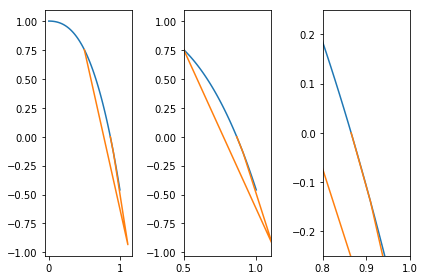

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 100
sample = [ i/(n-1) for i in range(n) ]
y = [f(x) for x in sample]
plt.subplot(1,3,1)
plt.plot(sample, y)
plt.plot(x_hist, f_hist)
plt.subplot(1,3,2)
plt.plot(sample, y)
plt.plot(x_hist, f_hist)
plt.xlim(0.5,1.1)
plt.subplot(1,3,3)
plt.plot(sample, y)
plt.plot(x_hist, f_hist)
plt.xlim(0.8,1.)
plt.ylim(-0.25, 0.25)
plt.tight_layout()

### Convergence de la méthode de Newton

On peut établir des preuves de convergence de la méthode de Newton caractérisant la vitesse de convergence de cette dernière. On ne détaillera pas ici les aspects théoriques de la chose, il faut simplement reternir que dans le cas où la fonction $f$ est convexe la méthode de Newton converge de manière quadratique. 

Cela signifie en pratique que dans le cas où la fonction $f$ possède les bonnes propriétés mathématiques si le résidu à l'itération $(k)$ est de l'ordre de $10^{-2}$ alors à l'itération $(k+1)$ il sera de l'ordre de $10^{(-4)}$.

Pour rappel une fonction $f(x)$ est convexe sur $I$ si 

$$ f( \lambda x + (1-\lambda ) y ) \leq \lambda f(x) + (1 - \lambda) f(y) \;\;\; \forall (x,y) \in I^2 \;\; \forall \lambda \in [0,1] $$







### Variantes de la méthodes de Newton 

La méthode de Newton implique donc de calculer, à chaque itération, la dérivée de la fonction objectif. Suivant la fonction considérée le calcul de cette dérivée peut être soit : (i) très compliqué ; (ii) très couteux. De fait des méthodes, dérivées de la méthode de Newton, ont été développée afin de réduire la compléxité et le coût de calcul. 

#### Quasi-Newton 

La première variante de la méthode de Newton est la méthode dite de quasi-Newton. Le principe est de ne plus évaluer la fonction dérivée à chaque itérations mais de l'évaluer uniquement toutes les $m$ iterations. Cela permet alors, dans le cas où le calcul de la dérivée représente un coup de calcul non-négligeable, de réduire les temps de calculs. En revanche avec cette approche on perd la convergence quadratique de la méthode de Newton ce qui entraîne un nombre d'itération à convergence plus élevé. 

**Exercice** : 
Implémenter la méthode de quasi-newton et traiter l'exemple du cours et comparer la convergence avec la méthode de Newton. 

$$ f(x) = \cos x - x^3 $$

In [113]:
from math import cos, sin

f  = lambda x: cos(x) - x**3
df = lambda x: -sin(x) - 3*x**2

x = 0.5
i = 0
freq = 3
n_iter_max = 100
x_hist = [x,]
f_hist = [f(x),]
while abs(f(x)) > 1.e-9 and i < n_iter_max:
    if i%freq == 0:
        df_eval = df(x) 
    x -= f(x)/df_eval
    i += 1
    print( "Ite {} => x = {} ; |f(x)| = {}".format(i, x, abs(f(x))))
    x_hist.append( x )
    f_hist.append( f(x) )

Ite 1 => x = 1.1121416370972725 ; |f(x)| = 0.9328201795040985
Ite 2 => x = 0.35339688175149364 ; |f(x)| = 0.894067003182728
Ite 3 => x = 1.0806202678849752 ; |f(x)| = 0.7911024647165332
Ite 4 => x = 0.9002285701551331 ; |f(x)| = 0.10812465966739138
Ite 5 => x = 0.875573368340219 ; |f(x)| = 0.030683025887718984
Ite 6 => x = 0.8685768497118039 ; |f(x)| = 0.009363087121268543
Ite 7 => x = 0.865483340232459 ; |f(x)| = 2.800111502487823e-05
Ite 8 => x = 0.8654740888270582 ; |f(x)| = 1.676521554916377e-07
Ite 9 => x = 0.865474033435762 ; |f(x)| = 1.005295846567833e-09
Ite 10 => x = 0.8654740331016144 ; |f(x)| = 1.1102230246251565e-16


### Méthode sécante

La méthode sécante permet de mettre en place une résolution de type Newton sans connaitre l'expression de la dérivée $f'(x)$. Pour cela le principe est d'approximer la dérivée par le taux de variation de la fonction $f$ entre deux itérés. 

$$
f'(x) \simeq \frac{ f(x^{(k)} ) - f(x^{(k-1)}) }{  x^{(k)} - x^{(k-1)} } 
$$

La première chose que l'on peut constater est qu'avec cette méthode il faut fournir à l'initialiation de l'algorithme $x^{(0)}$ **et** $x^{(1)}$ avec  $ x^{(0)} \neq x^{(1)} $.


**Exercice :** implémenter la méthode de la sécante et l'appliquer sur l'exemple du cours. 
    
$$ f(x) = \cos x - x^3 $$

In [114]:
from math import cos, sin

f  = lambda x: cos(x) - x**3
df = lambda x, x_old: (f(x)-f(x_old))/(x - x_old) 

x = 0.5
i = 0
freq = 3
x_hist = [x,]
f_hist = [f(x),]
n_iter_max = 100
x = 1.
x_hist.append( x )
while abs(f(x)) > 1.e-9 and i < n_iter_max:
    x -= f(x)/df(x, x_hist[-2])
    i += 1
    print( "Ite {} => x = {} ; |f(x)| = {}".format(i, x, abs(f(x))))
    x_hist.append( x )
    f_hist.append( f(x) )

Ite 1 => x = 0.810399578872862 ; |f(x)| = 0.15698108892188467
Ite 2 => x = 0.8586640585120002 ; |f(x)| = 0.02035290369817555
Ite 3 => x = 0.8658538071318002 ; |f(x)| = 0.001142986089763931
Ite 4 => x = 0.8654715115979841 ; |f(x)| = 7.586022334526987e-06
Ite 5 => x = 0.8654740321722509 ; |f(x)| = 2.796025966311788e-09
Ite 6 => x = 0.8654740331016167 ; |f(x)| = 6.994405055138486e-15


## Cas d'un système d'équation 

Considérons à présent le cas général d'un système d'équations 

$$ \mathcal{R}( \mathbf{x} ) = \mathbf{0} $$

La résolution de cette équation non-linéaire se fait par extension de la méthode de Newton, présentée précédement, au cas multi-dimensionnel. Pour cela la suite récurrente se contruit de la manière suivante : 

$$ \mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - D\left( \mathcal{R}( \mathbf{x}^{(k)} ) \right)^{-1} \cdot \mathcal{R}( \mathbf{x}^{(k)} ) $$


La notation $D\left( \mathcal{R}( \mathbf{x}^{(k)} )\right)$ symbolise le gradient (dérivée multidimensionnelle) de la fonctionnelle $\mathcal{R}$. Il s'agit donc de la matrice jacobienne de $\mathcal{R}$ évaluée en $\mathbf{x}^{(k)}$. Concrètement cette matrice jacobienne se définit, dans le cas d'un système de taille $n$, de la manière suivante : 

$$ \left[ D\left( \mathcal{R}( \mathbf{x}^{(k)} )\right) \right]_{ij} = \left. \frac{ \partial [ \mathcal{R} ]_{i} }{ \partial [\mathbf{x}]_{j} } \right\vert_{\mathbf{x}=\mathbf{x}^{(k)}} \;\;\; \forall (i,j) \in N,N$$


Toute la difficultée associée à la mise en place d'une méthode de Newton pour la résolution d'un problème multi-dimensionnel non-linéaire réside dans le calcul de la matrice Jacobienne qui suivant les applications peut s'avérer être très complexe à déterminer. Vous verrez notamment que dans le cadre des comportement matériaux non-linéaire le calcul de cette matrice atteint une compléxité extrème car nécessite de calculer des dérivées tensorielle associées à la loi de comportement utilisée. 

**Exemple** : considérons pour illustrer la méthode le système de deux équations suivant 

$$
\begin{cases}
x_1^{2} + 2 x_1 x_2 &= 0 \\
x_1 x_2 + 1           &= 0
\end{cases}
$$


In [118]:
import numpy as np

def f( x ):
    return np.array([[x[0,0]**2 + 2*x[0,0]*x[1,0]],[x[0,0]*x[1,0]+1]])

def df( x ):
    jac = np.zeros( (x.shape[0], x.shape[0]))
    jac[0,0] = 2*x[0,0] + 2*x[1,0]
    jac[0,1] = 2*x[0,0]
    jac[1,0] = x[1,0]
    jac[1,1] = x[0,0]
    return jac


n_iter_max = 100
x = 1. + np.zeros((2,1))
i = 0
while np.linalg.norm( f(x) ) > 1.e-9 and i < n_iter_max:
    jac = df(x)
    res = f(x)
    dx = np.linalg.solve( jac, res )
    x -= dx
    i += 1
    print("Ite {} => || f(x) || = {:.3e}".format(i, np.linalg.norm( f(x) )))
    
print("Solution is {}".format(x))

Ite 1 => || f(x) || = 2.574e+00
Ite 2 => || f(x) || = 1.336e-01
Ite 3 => || f(x) || = 2.293e-04
Ite 4 => || f(x) || = 3.434e-10
Solution is [[ 1.41421356]
 [-0.70710678]]


Si l'on résout le même problème en considérant une méthode de quasi-newton, c'est à dire que la matrice Jacobienne n'est calculée qu'une seule fois (à l'initialisation) on constate que la convergence quadratique n'est pas conservée et que le nombre d'itération nécessaire est bien supérieur.

In [119]:
x = 1. + np.zeros((2,1))
i = 0
n_iter_max = 100

jac = df(x)

while np.linalg.norm( f(x) ) > 1.e-6 and i < n_iter_max:
    res = f(x)
    dx = np.linalg.solve( jac, res )
    x -= dx
    i += 1
    print("Ite {} => || f(x) || = {:.3e}".format(i, np.linalg.norm( f(x) )))
    
print("Solution is {}".format(x))

Ite 1 => || f(x) || = 2.574e+00
Ite 2 => || f(x) || = 1.755e+00
Ite 3 => || f(x) || = 9.466e-01
Ite 4 => || f(x) || = 5.043e-01
Ite 5 => || f(x) || = 2.507e-01
Ite 6 => || f(x) || = 1.222e-01
Ite 7 => || f(x) || = 5.804e-02
Ite 8 => || f(x) || = 2.715e-02
Ite 9 => || f(x) || = 1.252e-02
Ite 10 => || f(x) || = 5.720e-03
Ite 11 => || f(x) || = 2.589e-03
Ite 12 => || f(x) || = 1.164e-03
Ite 13 => || f(x) || = 5.197e-04
Ite 14 => || f(x) || = 2.309e-04
Ite 15 => || f(x) || = 1.021e-04
Ite 16 => || f(x) || = 4.498e-05
Ite 17 => || f(x) || = 1.974e-05
Ite 18 => || f(x) || = 8.638e-06
Ite 19 => || f(x) || = 3.768e-06
Ite 20 => || f(x) || = 1.640e-06
Ite 21 => || f(x) || = 7.120e-07
Solution is [[ 1.41421356]
 [-0.70710701]]


In [120]:
x = 1. + np.zeros((2,1))
i = 0
f_update = 7
n_iter_max = 100

while np.linalg.norm( f(x) ) > 1.e-6 and i < n_iter_max:
    res = f(x)
    if i%f_update == 0:
        jac = df(x)
    dx = np.linalg.solve( jac, res )
    x -= dx
    i += 1
    print("Ite {} => || f(x) || = {:.3e}".format(i, np.linalg.norm( f(x) )))
    
print("Solution is {}".format(x))

Ite 1 => || f(x) || = 2.574e+00
Ite 2 => || f(x) || = 1.755e+00
Ite 3 => || f(x) || = 9.466e-01
Ite 4 => || f(x) || = 5.043e-01
Ite 5 => || f(x) || = 2.507e-01
Ite 6 => || f(x) || = 1.222e-01
Ite 7 => || f(x) || = 5.804e-02
Ite 8 => || f(x) || = 1.886e-05
Ite 9 => || f(x) || = 9.216e-09
Solution is [[ 1.41421356]
 [-0.70710678]]


Pour finir comparons les courbes de convergence entre les différentes variantes de la méthode de Newton. On considère pour cela toujours le même problème que précédemment. 

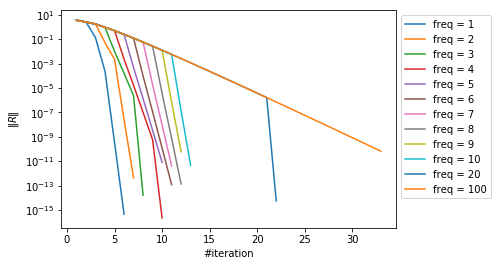

In [124]:
import matplotlib.pyplot as plt

def newton(func, dfunc, x0, crit, freq=1):
    i = 0
    conv = [np.linalg.norm( f(x0) ), ]
    x = x0
    while np.linalg.norm( f(x) ) > crit:
        if i%freq == 0:
            jac = df(x)
            
        res = f(x)
        dx = np.linalg.solve( jac, res )
        x -= dx
        i += 1
        conv.append( np.linalg.norm( f(x) ) )
    return conv

epsilon = 1.e-10
        
for freq in [1,2,3,4,5,6,7,8,9,10,20,100]:
    x0 = 1. + np.zeros((2,1))
    convergence = newton(f, df, x0, epsilon, freq )

    plt.semilogy( range(1,len(convergence)+1), convergence, label="freq = {}".format(freq) )
    
plt.xlabel("#iteration")
plt.ylabel("$\Vert R \Vert $")
plt.legend(bbox_to_anchor=(1., 1.0))


### Approximation de la jacobienne

Comme déjà dit précédemment il est parfois très compliqué de calculer la matrice jacobienne. Dans ce cas il existe des approches permettant d'approximer cette dernière. Nous allons ici présenter l'approche très classique (parmis de nombreuses autres) : approximation par différences finies. 

**Approximation par différence finies**
L'idée de base de cette approche est de remplacer la dérivée de la fonctionnelle selon une variable par une approximation calculée à l'aide des différences finies. Concrètement cela se traduit, dans le cadre d'une approximation d'ordre 1 par : 

$$ \left[ D\left( \mathcal{R}( \mathbf{x}^{(k)} )\right) \right]_{ij} = \left. \frac{ \partial [ \mathcal{R} ]_{i} }{ \partial [\mathbf{x}]_{j} } \right\vert_{\mathbf{x}=\mathbf{x}^{(k)}} \simeq  \frac{ [ \mathcal{R}( \mathbf{x} + h \mathbf{e}_{j} ) ]_{i} - [\mathcal{R}( \mathbf{x} ) ]_{i} }{ h } $$ 

De manière concrête cette approximation se traduit en Python de la manière suivante : 

In [82]:
def approx_diff1( func, x, h=0.01):
    jac = np.zeros((x.shape[0], x.shape[0]))
    fx = func(x)
    for j in range(x.shape[0]):
        dx = np.zeros_like(x)
        dx[j,[0]] = h*x[j]
        jac[:,[j]] = (func(x+dx) - fx)/h
    return jac

x0 = np.array([[1.], [1.]])

j_diff1 = approx_diff1(f, x0,h=0.01)
j_exact = df(x0)

print("Jacobienne exacte :\n {} ".format(j_exact))
print("Approximation ordre 1 :\n{}".format(j_diff1))


Jacobienne exacte :
 [[4. 2.]
 [1. 1.]] 
Approximation ordre 1 :
[[4.01 2.  ]
 [1.   1.  ]]


Si l'on souhaite une approximation au second ordre il est alors nécessaire d'utiliser la formule suivante :
$$ \left[ D\left( \mathcal{R}( \mathbf{x}^{(k)} )\right) \right]_{ij} = \left. \frac{ \partial [ \mathcal{R} ]_{i} }{ \partial [\mathbf{x}]_{j} } \right\vert_{\mathbf{x}=\mathbf{x}^{(k)}} \simeq  \frac{ [ \mathcal{R}( \mathbf{x} + h \mathbf{e}_{j} ) ]_{i} - [\mathcal{R}( \mathbf{x} -  h \mathbf{e}_{j} ) ]_{i} }{ 2h } $$ 


In [83]:
def approx_diff2( func, x, h=0.01):
    jac = np.zeros((x.shape[0], x.shape[0]))
    fx = func(x)
    for j in range(x.shape[0]):
        dx = np.zeros_like(x)
        dx[j,[0]] = h*x[j]
        jac[:,[j]] = (func(x+dx) - func(x-dx))/(2.*h)
    return jac

x0 = np.array([[1.], [1.]])

j_diff2 = approx_diff2(f, x0,h=0.01)
j_exact = df(x0)

print("Jacobienne exacte :\n {} ".format(j_exact))
print("Approximation ordre 2 :\n{}".format(j_diff2))


Jacobienne exacte :
 [[4. 2.]
 [1. 1.]] 
Approximation ordre 2 :
[[4. 2.]
 [1. 1.]]


Si l'on utilise alors cette approximation de la matrice tangente pour résoudre notre problème non-linéaire on obtient la convergence suivante : 

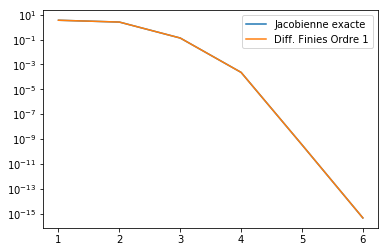

In [96]:
def df_approx( x ):
    h = 0.001
    jac = approx_diff2(f, x, h)

x0 = 1. + np.zeros((2,1))
conv_parfaite = newton(f, df, x0, epsilon)
x0 = 1. + np.zeros((2,1))
conv_approx = newton(f, df_approx, x0, epsilon)


plt.semilogy(range(1,len(conv_parfaite)+1), conv_parfaite, label="Jacobienne exacte")
plt.semilogy(range(1,len(conv_approx)+1), conv_approx, label="Diff. Finies Ordre 1")
plt.legend()

### Dans l'environnement Python 

Bien évidemment vous n'êtes pas obligé de ré-implémenter vous même la méthode de Newton si vous avez un résoudre un problème non-linéaire. Des fonctions sont déjà disponibles dans `scipy.optimize`. Il s'agit entre autre des fonctions `root` et `fsolve`. Il faut cependant faire attention au fait que caché derrière ces deux fonctions, il y a en fait une grosse machinerie qui comprends de nombreuses méthodes de résolution et pas uniquement la méthode de Newton classique. 


Le module `scipy.optimize` dispose en réalité d'une grande variété de méthode permettant de trouver la solution d'un problème non-linéaire qu'il soit scalaire ou vectoriel. Pour plus d'information je vous recommande d'allez voir la [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) du module d'optimization à la section **Root finding**.



## Exercice

On considère un système de ressorts dont chaque éléments dispose d'une rigidité non-linéaire fonction du déplacement de la forme: 
$$ \mathcal{K} \left( x \right) = k_{0} \left( 1 + e^{- u } + x^5 \right)  $$

Text(0, 0.5, 'Rigidite')

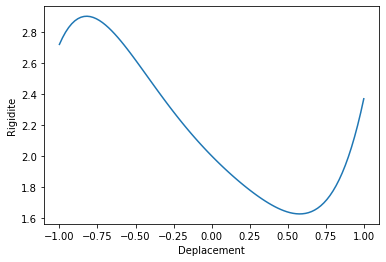

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

k0 =1.
rigi = lambda x, k0: k0*(1.+np.exp(-x) + x**5 )

list_u = np.linspace(-1,1.,100)

list_k = rigi( list_u, k0)

plt.plot(list_u, list_k)
plt.xlabel("Deplacement")
plt.ylabel("Rigidite")

L'énergie potentielle $E(\mathbf{x})$ est la somme des énergies de chaque ressort reliant $x_i$ à $x_j$, moins le travail des efforts extérieurs (ici $x_N \: F$):
$$ E(\mathbf{x}) = \sum_{i=1}^N \frac{1}{2}  \left(x_{L(i,1)} - x_{L(i,2)}\right) \cdot \mathcal{K}\left(  x_{L(i,1)} - x_{L(i,2)} \right) - x_N\: F $$
$L(k,:)$ est la table de connectivité indiquant les points d'accroche des ressorts.


* Construire une fonction `build_system( F, k, N)` construisant la matrice jacobienne $\mathbf{K}$ et le second membre $\mathbf{F}$.
* Commenter le profil de la matrice
* 
* Étudier le temps de calcul de la factorisation pour $N=10,100,500,1000,5000,10000$
* Comment peut on augmenter la largeur  de bande de la matrice ?
* Alors faite le
* Refaire l'étude des temps de factorisation
* Comment peut-on tirer parti de la structure de la matrice ?